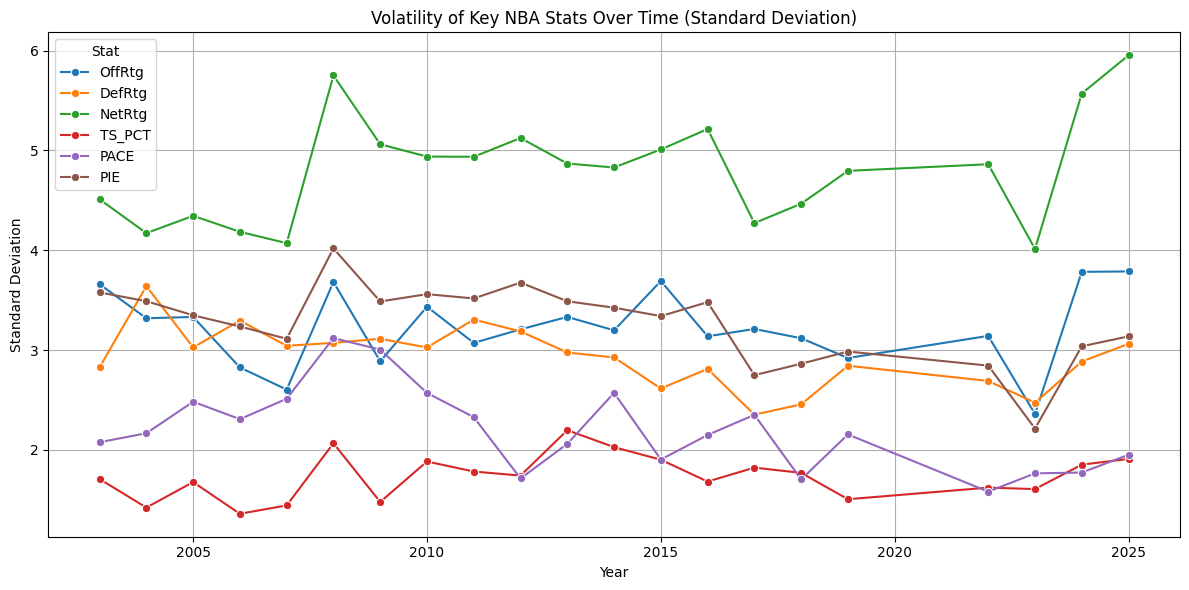

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
# Use a placeholder path. Replace with your actual path.
team_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'
df = pd.read_csv(team_path)

# Ensure 'Year' is integer and remove outlier years like 2020
df['Year'] = df['Year'].astype(int)
df = df[df['Year'] != 2020]

# --- Select key metrics ---
stats = ['OffRtg', 'DefRtg', 'NetRtg', 'TS_PCT', 'PACE', 'PIE']

# --- Compute standard deviation of each stat per year ---
volatility_df = df.groupby('Year')[stats].std().reset_index()

# --- Melt for plotting ---
melted_volatility = volatility_df.melt(id_vars='Year', var_name='Stat', value_name='StdDev')

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_volatility, x='Year', y='StdDev', hue='Stat', marker='o')
plt.title('Volatility of Key NBA Stats Over Time (Standard Deviation)')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.tight_layout()
plt.show()


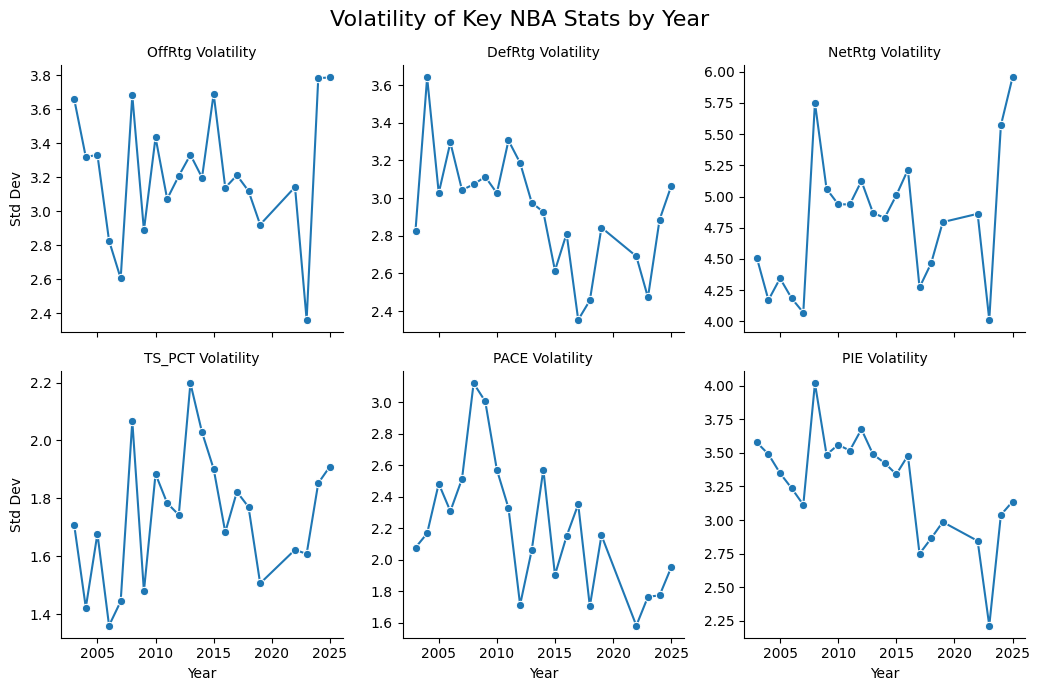

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume melted_volatility is already created
g = sns.FacetGrid(melted_volatility, col='Stat', col_wrap=3, height=3.5, sharey=False)
g.map(sns.lineplot, 'Year', 'StdDev', marker='o')
g.set_titles("{col_name} Volatility")
g.set_axis_labels("Year", "Std Dev")
g.figure.suptitle("Volatility of Key NBA Stats by Year", fontsize=16)
plt.tight_layout()
plt.show()


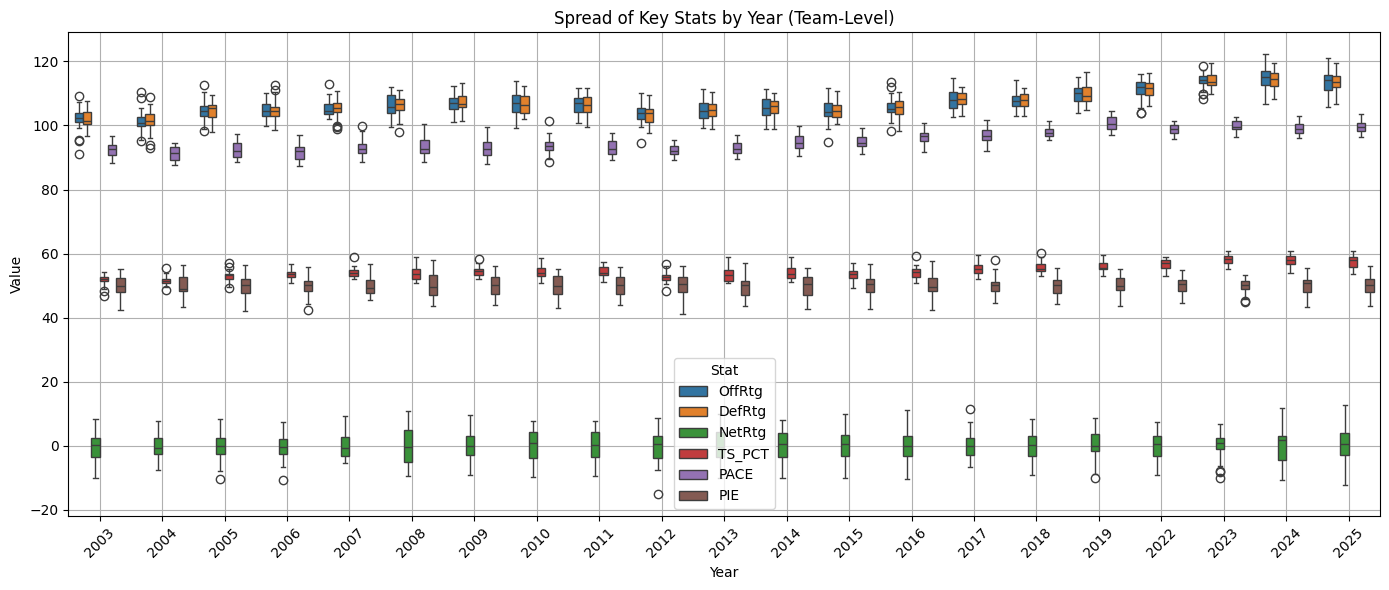

In [3]:
# Reorganize raw data, not std dev, for per-year boxplot
box_df = df[['Year'] + stats]
melted_box = box_df.melt(id_vars='Year', var_name='Stat', value_name='Value')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Value', hue='Stat', data=melted_box)
plt.title('Spread of Key Stats by Year (Team-Level)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# This prints the original wide-format standard deviation values
print(volatility_df)


    Year    OffRtg    DefRtg    NetRtg    TS_PCT      PACE       PIE
0   2003  3.660349  2.827482  4.510538  1.708188  2.076994  3.577767
1   2004  3.318986  3.640633  4.171472  1.422609  2.167241  3.489890
2   2005  3.332073  3.027045  4.345028  1.677765  2.482736  3.348633
3   2006  2.826193  3.295319  4.184861  1.360206  2.308116  3.236423
4   2007  2.604331  3.042853  4.070985  1.444056  2.512543  3.113257
5   2008  3.682061  3.072722  5.750646  2.066762  3.120020  4.018555
6   2009  2.887916  3.113220  5.061667  1.478956  3.005006  3.487093
7   2010  3.434318  3.026405  4.938287  1.884141  2.571035  3.560376
8   2011  3.071979  3.305866  4.936535  1.783591  2.328191  3.517394
9   2012  3.207909  3.186927  5.124206  1.742666  1.713882  3.675917
10  2013  3.332349  2.975919  4.868865  2.197700  2.060672  3.489195
11  2014  3.198177  2.926143  4.829113  2.028079  2.571594  3.424751
12  2015  3.691612  2.615304  5.009641  1.901675  1.903887  3.340514
13  2016  3.138152  2.811489  5.21

In [6]:
print(melted_volatility)

     Year    Stat    StdDev
0    2003  OffRtg  3.660349
1    2004  OffRtg  3.318986
2    2005  OffRtg  3.332073
3    2006  OffRtg  2.826193
4    2007  OffRtg  2.604331
..    ...     ...       ...
121  2019     PIE  2.985451
122  2022     PIE  2.844638
123  2023     PIE  2.213825
124  2024     PIE  3.038090
125  2025     PIE  3.137172

[126 rows x 3 columns]
